## Essancial Libraries

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer





## Read_Data

In [4]:
df = pd.read_csv('DataSet.csv')
df.head()

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482


## About Data

In [3]:
df.describe()

,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,499.969606,201.273420,1.484039,299.586427,3.999551,100.220798,48.674500,2072.857450
std,98.840116,49.953760,0.503743,81.524787,0.497141,19.176983,28.940548,346.007903
min,129.120339,46.777157,-0.527025,46.020085,2.449741,36.004789,1.000000,1094.518587
25%,434.452593,167.001091,1.150430,241.267538,3.656696,87.297706,23.000000,1808.106571
50%,500.600031,201.052487,1.485411,301.346897,3.985916,99.951705,49.000000,2068.173855
75%,566.588504,235.146602,1.826129,355.093381,4.338487,112.597996,74.000000,2341.223175
max,865.770180,379.973339,3.046715,552.443030,5.550593,164.320403,99.000000,3115.114292


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductCategory      2000 non-null   object 
 1   Region               2000 non-null   object 
 2   CustomerSegment      2000 non-null   object 
 3   IsPromotionApplied   2000 non-null   object 
 4   ProductionCost       2000 non-null   float64
 5   MarketingSpend       2000 non-null   float64
 6   SeasonalDemandIndex  2000 non-null   float64
 7   CompetitorPrice      2000 non-null   float64
 8   CustomerRating       2000 non-null   float64
 9   EconomicIndex        2000 non-null   float64
 10  StoreCount           2000 non-null   int64  
 11  SalesRevenue         2000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 187.6+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

### Data Distribution

In [6]:
columns = df.select_dtypes(include=['float64','int64']).columns

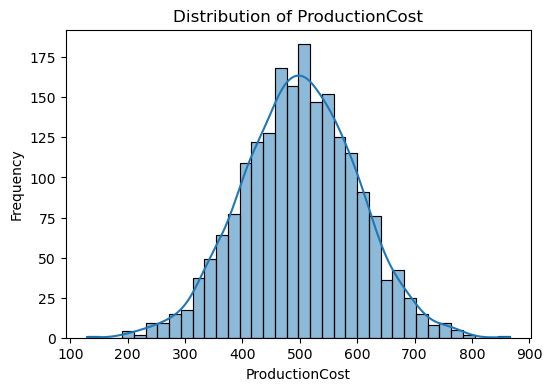

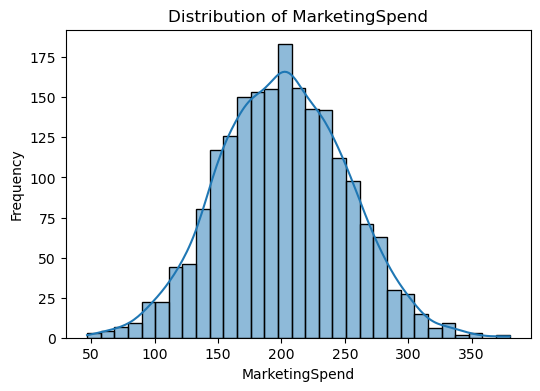

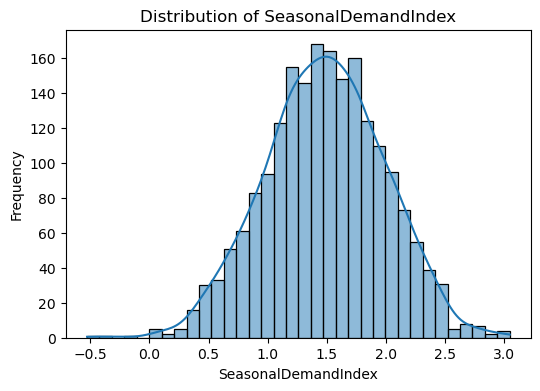

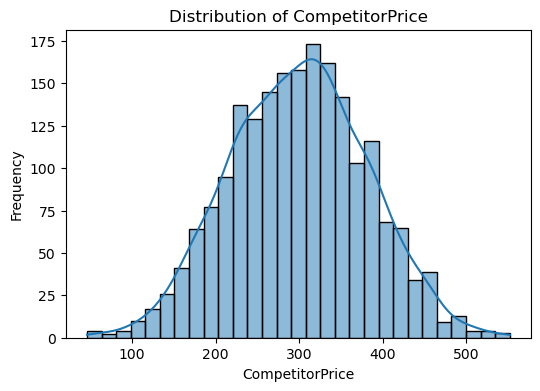

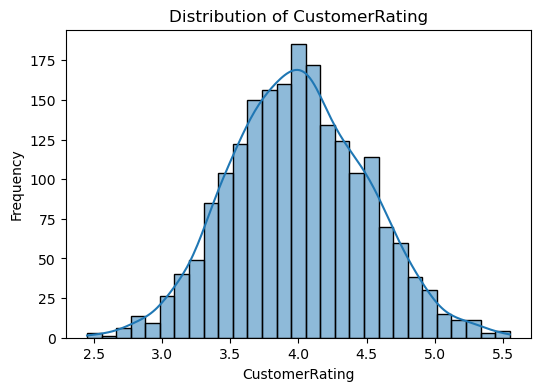

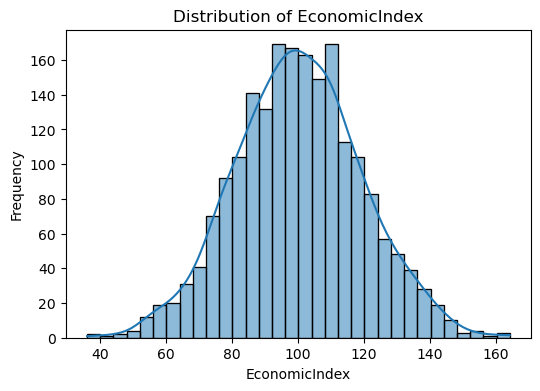

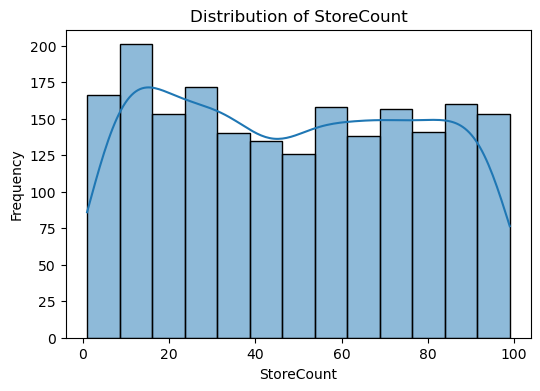

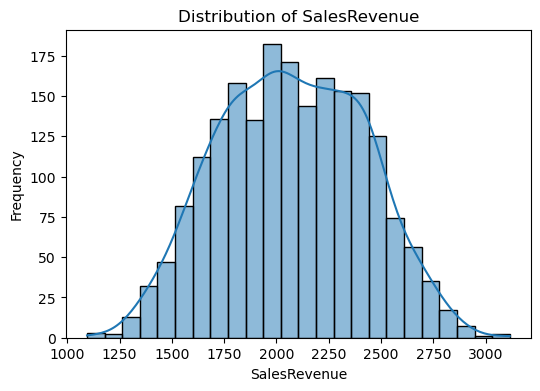

In [7]:
for column in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## EDA


### Category Distribution

#### No.of Products Sold

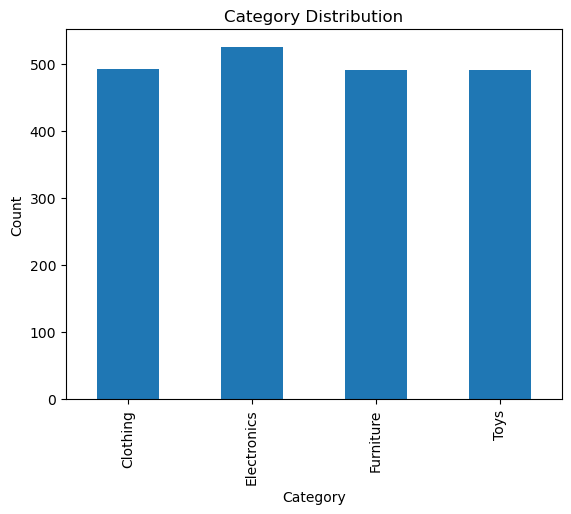

In [9]:
df.groupby('ProductCategory').size().plot(kind='bar')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

#### Product wise Sales

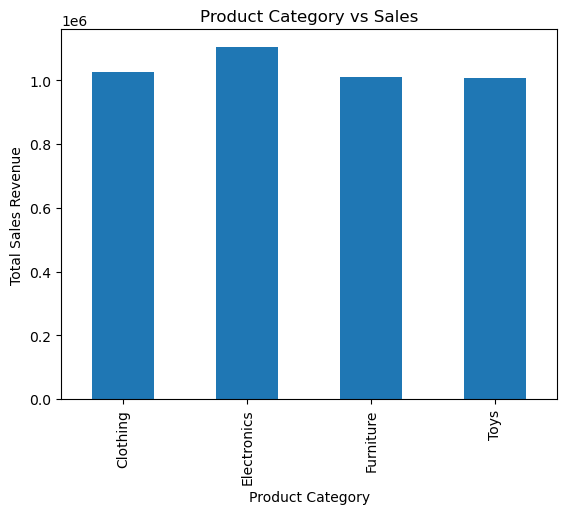

In [35]:
df.groupby('ProductCategory')['SalesRevenue'].sum().plot(kind='bar')
plt.title('Product Category vs Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Revenue')
plt.show()

### Region

#### Region vs Sales

<Axes: xlabel='Region'>

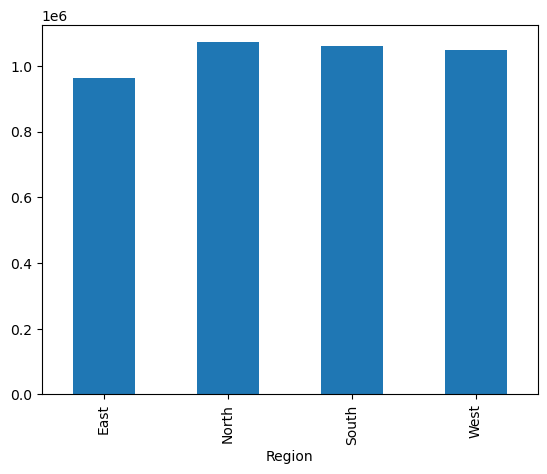

In [40]:
df.groupby('Region')['SalesRevenue'].sum().plot(kind='bar')

#### region vs product counts

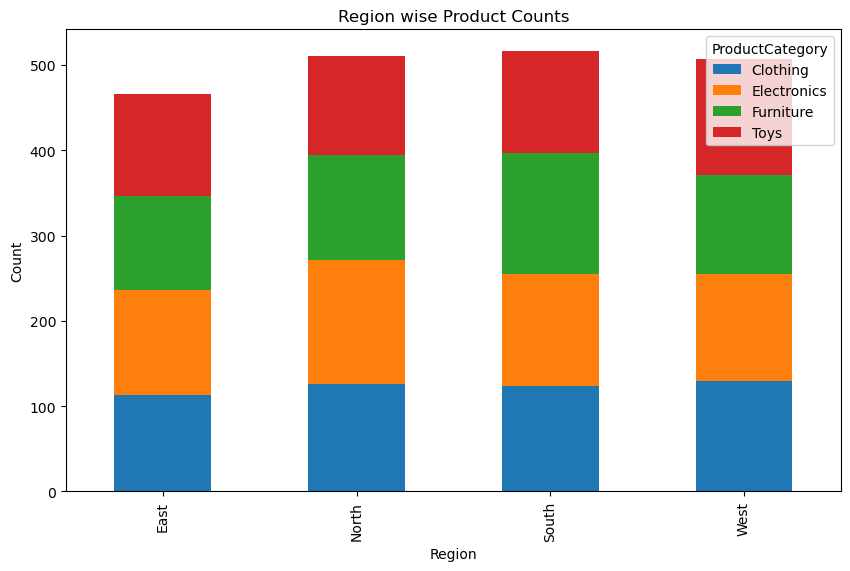

In [38]:
df.groupby(['Region','ProductCategory']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Region wise Product Counts')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


#### Region vs Sales Count

<Figure size 1000x1000 with 0 Axes>

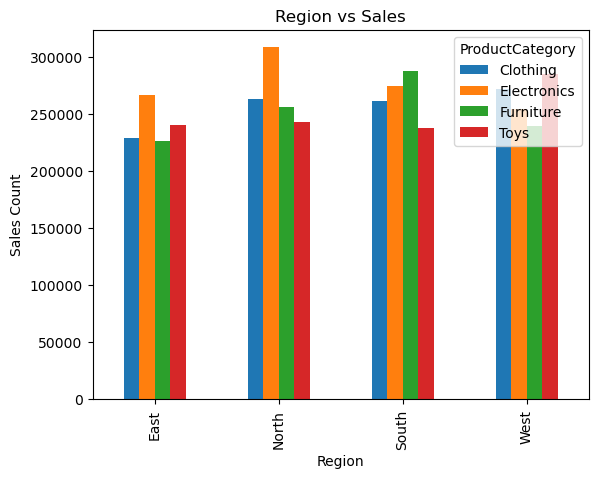

In [39]:
plt.figure(figsize=(10,10))
ax = df.groupby(['Region','ProductCategory'])['SalesRevenue'].sum().unstack().plot(kind='bar')
plt.title('Region vs Sales')
plt.xlabel('Region')
plt.ylabel('Sales Count')
plt.show()

#### Product Category vs Sales

<Figure size 800x600 with 0 Axes>

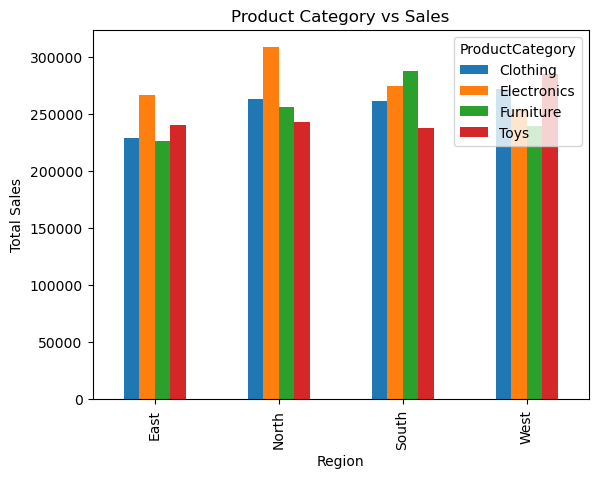

In [24]:
plt.figure(figsize=(8,6))
ax = df.groupby(['Region','ProductCategory'])['SalesRevenue'].sum().unstack().plot(kind='bar')
plt.title('Product Category vs Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

## Customer Segmentation

#### Customer Segmentaton vs Count 

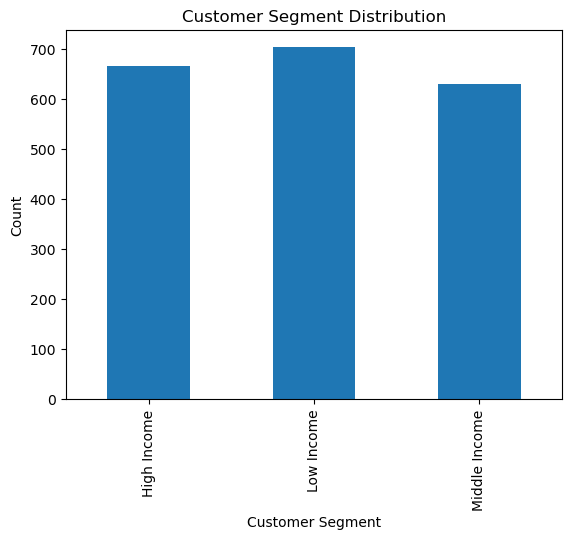

In [42]:
df.groupby('CustomerSegment').size().plot(kind='bar')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

#### CustomerSegmentation VS Sales

<Axes: xlabel='CustomerSegment'>

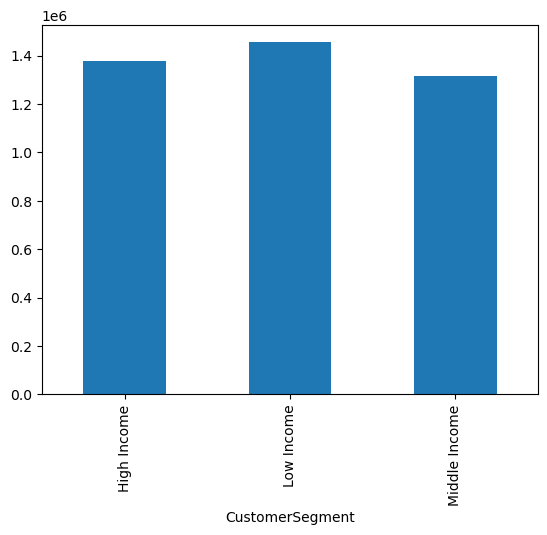

In [48]:
df.groupby('CustomerSegment')['SalesRevenue'].sum().plot(kind='bar')

#### Region VS CustomerSegmentation

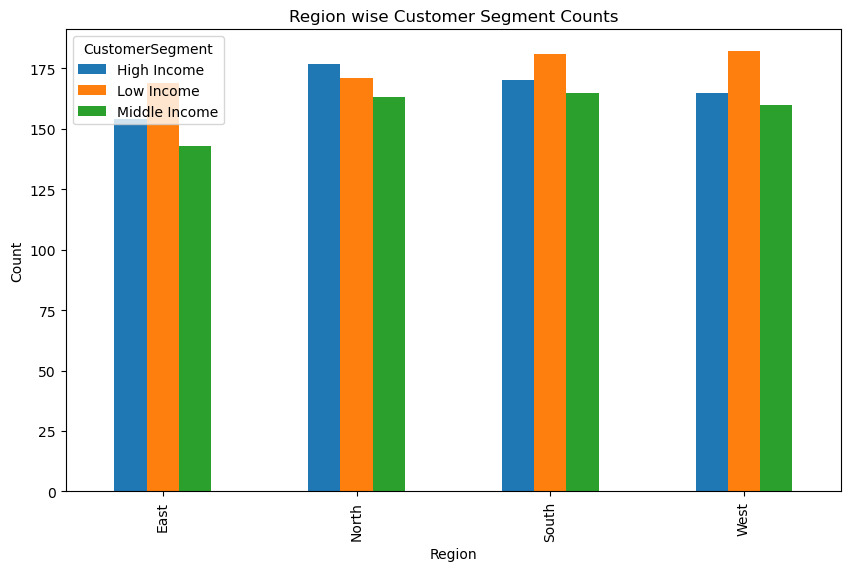

In [49]:
df.groupby(['Region','CustomerSegment']).size().unstack().plot(kind='bar',figsize=(10,6))
plt.title('Region wise Customer Segment Counts')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


#### CustomerSegmentation,Product VS Count

<Axes: xlabel='CustomerSegment'>

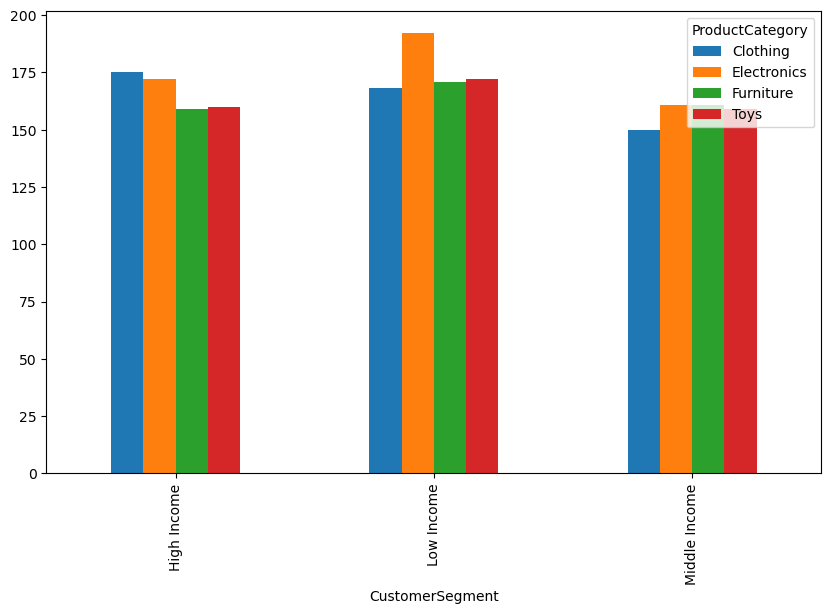

In [45]:
df.groupby(['CustomerSegment','ProductCategory']).size().unstack().plot(kind='bar',figsize=(10,6))

#### CustomerSegmentation,Product VS Sales

<Axes: xlabel='CustomerSegment'>

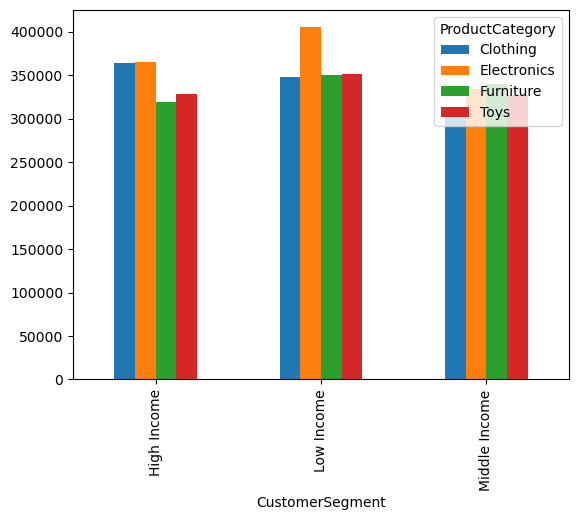

In [47]:
df.groupby(['CustomerSegment','ProductCategory'])['SalesRevenue'].sum().unstack().plot(kind='bar')

#### Region,CustomerSegmentation  VS Sales

<Axes: xlabel='Region'>

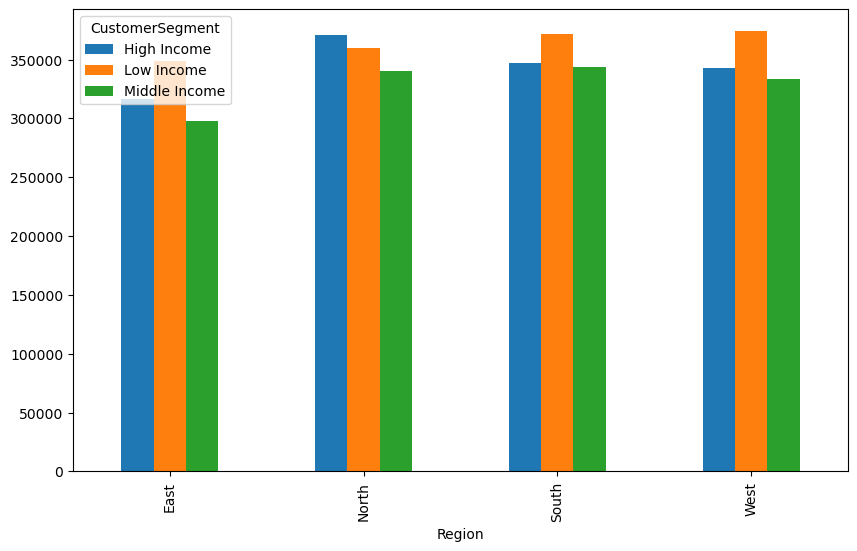

In [50]:
df.groupby(['Region','CustomerSegment'])['SalesRevenue'].sum().unstack().plot(kind='bar',figsize=(10,6))

## Production

#### Production VS Sales

In [51]:
df.columns

Index(['ProductCategory', 'Region', 'CustomerSegment', 'IsPromotionApplied',
       'ProductionCost', 'MarketingSpend', 'SeasonalDemandIndex',
       'CompetitorPrice', 'CustomerRating', 'EconomicIndex', 'StoreCount',
       'SalesRevenue'],
      dtype='object')

In [55]:
bins = [100,200,300,400,500,600,700,800,900]
labels = ['100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900']
df['ProductionCost_Bin'] = pd.cut(df['ProductionCost'], bins=bins, labels=labels, right=False)
df.head()

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue,ProductionCost_Bin
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707,500-600
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368,300-400
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023,600-700
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857,300-400
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482,400-500


#### Manufacturing Cost VS Sales 

C:\Users\Dell\AppData\Local\Temp\ipykernel_11868\2253355144.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ProductionCost_Bin').size().plot(kind='bar')


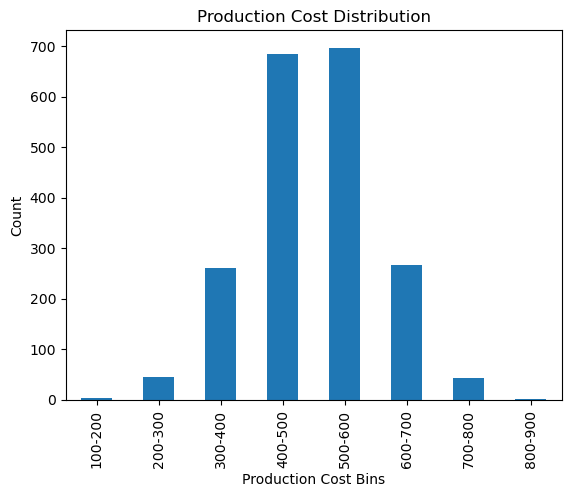

In [56]:
df.groupby('ProductionCost_Bin').size().plot(kind='bar')
plt.title('Production Cost Distribution')
plt.xlabel('Production Cost Bins')
plt.ylabel('Count')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_11868\671991996.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['ProductionCost_Bin'])['SalesRevenue'].sum().plot(kind='bar')


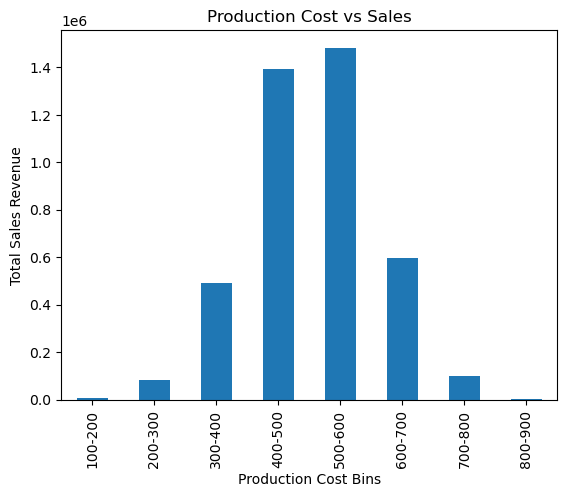

In [58]:
df.groupby(['ProductionCost_Bin'])['SalesRevenue'].sum().plot(kind='bar')
plt.title('Production Cost vs Sales')
plt.xlabel('Production Cost Bins')
plt.ylabel('Total Sales Revenue')
plt.show()
    

C:\Users\Dell\AppData\Local\Temp\ipykernel_11868\3556662391.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['ProductionCost_Bin','ProductCategory'])['SalesRevenue'].sum().unstack().plot(kind='bar')


<Axes: xlabel='ProductionCost_Bin'>

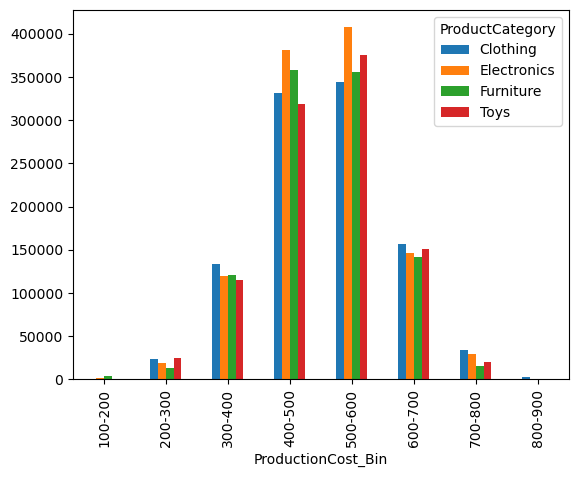

In [60]:
df.groupby(['ProductionCost_Bin','ProductCategory'])['SalesRevenue'].sum().unstack().plot(kind='bar')

# Model Implementation 

### Implementing data Pipelines

In [5]:
df = df.drop('ProductionCost_Bin', axis=1)


KeyboardInterrupt



In [6]:
df.head()

,ProductCategory,Region,CustomerSegment,IsPromotionApplied,ProductionCost,MarketingSpend,SeasonalDemandIndex,CompetitorPrice,CustomerRating,EconomicIndex,StoreCount,SalesRevenue
0,Furniture,East,High Income,Yes,536.051521,189.277811,1.159611,220.831351,4.035607,146.225757,52,2293.143707
1,Toys,West,High Income,No,352.701361,255.921497,1.545366,467.217175,4.106804,104.261304,35,1640.454368
2,Electronics,South,High Income,No,618.989105,277.399353,1.671902,363.623261,4.021775,77.220752,44,2173.086023
3,Furniture,West,Middle Income,Yes,339.959644,153.557699,1.408244,209.853621,4.148890,128.277455,15,1672.608857
4,Furniture,West,Middle Income,Yes,477.951385,155.814478,2.177301,274.859950,4.913782,111.309643,61,2443.222482


In [15]:
# --- Separate features and target ---
X = df.drop('SalesRevenue', axis=1)
y = df['SalesRevenue']


char_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float64','int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), char_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'regressor__max_depth': [3, 13, 15, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__max_features': ['sqrt', 'log2']
}


gridSearch = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

gridSearch.fit(X_train, y_train)


best_model = gridSearch.best_estimator_

print("Best Parameters:", gridSearch.best_params_)
print("Best CV Score:", gridSearch.best_score_)
print("Test R^2:", best_model.score(X_test, y_test))


Best Parameters: {'regressor__max_depth': 13, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 5}
Best CV Score: -43750.66612408373
Test R^2: 0.6484310600506143


In [28]:
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
feature_names

array(['num__ProductionCost', 'num__MarketingSpend',
       'num__SeasonalDemandIndex', 'num__CompetitorPrice',
       'num__CustomerRating', 'num__EconomicIndex', 'num__StoreCount',
       'cat__ProductCategory_Electronics',
       'cat__ProductCategory_Furniture', 'cat__ProductCategory_Toys',
       'cat__Region_North', 'cat__Region_South', 'cat__Region_West',
       'cat__CustomerSegment_Low Income',
       'cat__CustomerSegment_Middle Income',
       'cat__IsPromotionApplied_Yes'], dtype=object)

In [19]:
best_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:
training_data_predictions = best_model.predict(X_train)
testing_data_predictions  = best_model.predict(X_test)
# Training Data Evaluation
train_mse = mean_squared_error(y_train, training_data_predictions)
train_r2 = r2_score(y_train, training_data_predictions)
print(f"Training MSE: {train_mse}")
print(f"Training R^2: {train_r2}")
# Testing Data Evaluation
test_mse = mean_squared_error(y_test, testing_data_predictions)
test_r2 = r2_score(y_test, testing_data_predictions)
print(f"Testing MSE: {test_mse}")
print(f"Testing R^2: {test_r2}")


Training MSE: 5313.405991999734
Training R^2: 0.9555428958131245
Testing MSE: 42230.44268337512
Testing R^2: 0.6484310600506143


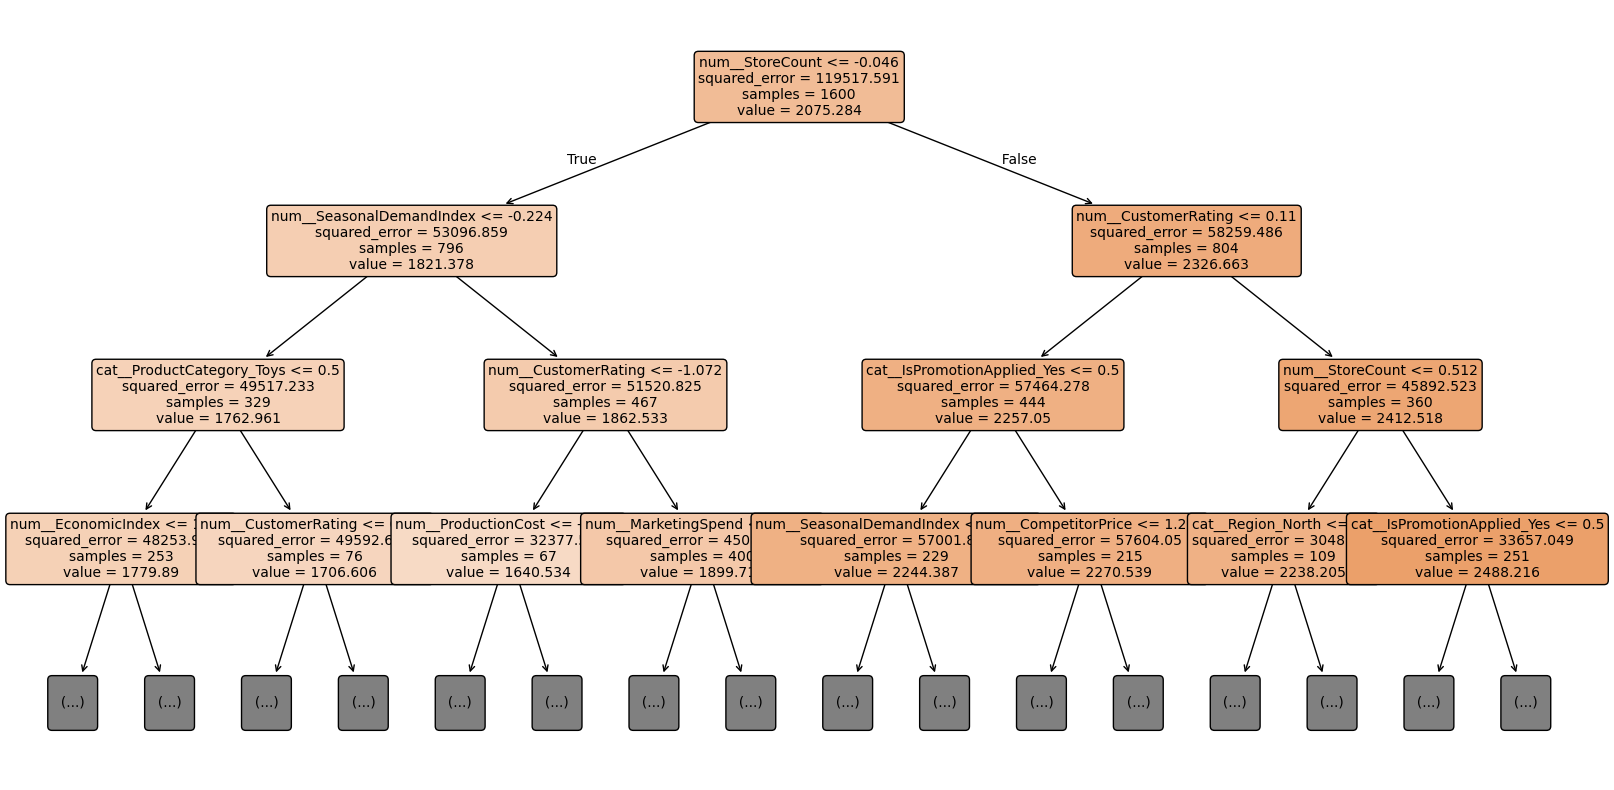

In [20]:
from sklearn.tree import plot_tree

best_regressor = best_model.named_steps['regressor']
plt.figure(figsize=(20,10))
plot_tree(
    best_regressor,
    max_depth=3,
    filled=True,
    feature_names=best_model.named_steps['preprocessor'].get_feature_names_out(),
    rounded=True,
    fontsize=10
)
plt.show()

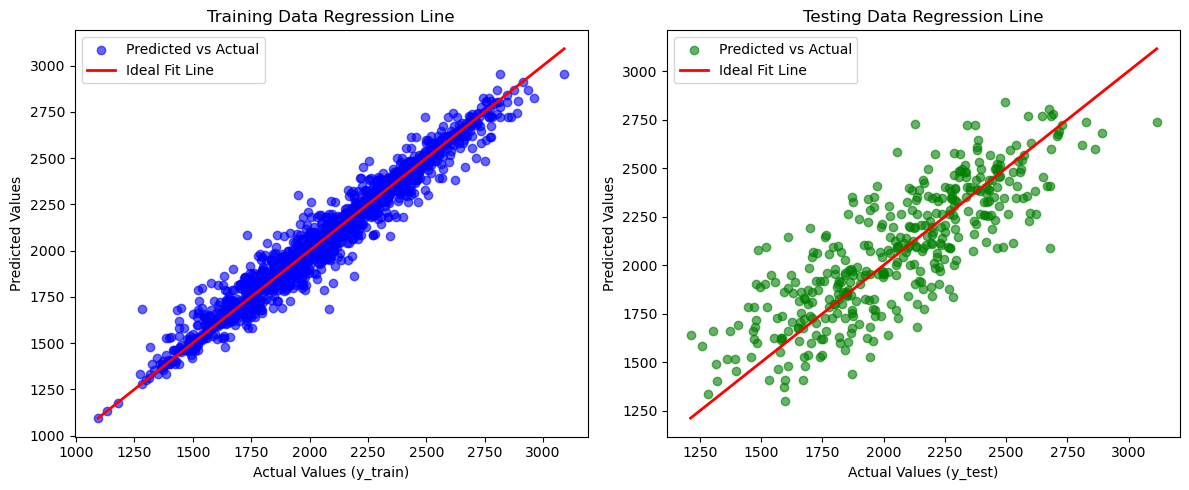

In [29]:
# Plot Training Data
plt.figure(figsize=(12,5))

# Training scatter
plt.subplot(1,2,1)
plt.scatter(y_train, training_data_predictions, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color="red", linewidth=2, label="Ideal Fit Line")
plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values")
plt.title("Training Data Regression Line")
plt.legend()

# Testing scatter
plt.subplot(1,2,2)
plt.scatter(y_test, testing_data_predictions, color="green", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Ideal Fit Line")
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Testing Data Regression Line")
plt.legend()

plt.tight_layout()
plt.show()
